In [1]:


import copy
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#импорты
maindf = pd.read_excel('/content/train.xlsx')
gruzDF = pd.read_excel('/content/Грузоперевозки.xlsx')
materials = pd.read_excel('/content/Данные рынка стройматериалов.xlsx')
indexLME = pd.read_excel('/content/Индекс LME.xlsx')
makropokazateli = pd.read_excel('/content/Макропоказатели.xlsx')
toplivo =  pd.read_excel('/content/Топливо.xlsx')
metall = pd.read_excel('/content/Показатели рынка металла.xlsx')
surye  = pd.read_excel('/content/Цены на сырье.xlsx')
CHMF = pd.read_csv('/content/CHMF Акции.csv')
MAGN = pd.read_csv('/content/MAGN Акции.csv')
NLMK = pd.read_csv('/content/NLMK Акции.csv')
#загрузка датасетов

#чтоб удобно было
dfs = {
    "maindf": maindf,
    "gruzDF": gruzDF,
    "materials": materials,
    "indexLME": indexLME,
    "makropokazateli": makropokazateli,
    "toplivo": toplivo,
    "metall": metall,
    "surye": surye,
    "CHMF": CHMF,
    "MAGN": MAGN,
    "NLMK": NLMK
}

for df_name, df in dfs.items():
  print(f"DataFrame: {df_name}")
  df.info()
  print("-" * 50)


DataFrame: maindf
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   dt                400 non-null    datetime64[ns]
 1   Цена на арматуру  400 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.4 KB
--------------------------------------------------
DataFrame: gruzDF
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 2 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   dt                               302 non-null    datetime64[ns]
 1   Индекс стоимости грузоперевозок  302 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.8 KB
--------------------------------------------------
DataFrame: materials
<class 'pandas.core.frame.D

везде все класс и круто кроме индксов мле и акций

In [2]:
''' убирает из доп данных колонки слабо заполненые '''
def process_dataframe(df):
    threshold = 0.8
    nans_count = df.isna().sum()
    to_drop = nans_count[nans_count / len(df) > threshold].index
    df.drop(to_drop, axis=1, inplace=True)
    df.fillna(method='bfill', inplace=True)
    return df


dfs_to_process =   ["maindf",
"gruzDF",
"materials",
"indexLME",
"makropokazateli",
"toplivo",
"metall",
"surye",
"CHMF",
"MAGN",
"NLMK"]
for df_name in dfs_to_process:
  if df_name in dfs:
    dfs[df_name] = process_dataframe(dfs[df_name])




<ipython-input-2-82698932994c>:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


In [3]:


# Функция для удаления столбцов, содержащих более 80% нулей
def drop_columns_with_high_zeros(df, threshold=0.8):
    """
    Удаляет столбцы, в которых доля нулей превышает пороговое значение (по умолчанию 80%).

    :param df: DataFrame
    :param threshold: Доля нулей, выше которой столбец удаляется
    :return: Очищенный DataFrame
    """
    zero_fraction = (df == 0).mean()  # Доля нулей в каждом столбце
    cols_to_drop = zero_fraction[zero_fraction > threshold].index
    return df.drop(columns=cols_to_drop)

# Функция для замены нулей на ближайшее ненулевое значение
def fill_zeros_with_nearest(df):
    """
    Заменяет нули на ближайшее ненулевое значение в каждом столбце DataFrame.
    Сначала заполняет вперед (метод ffill), затем назад (метод bfill).

    :param df: DataFrame
    :return: DataFrame с замененными нулями
    """
    df = df.replace(0, pd.NA)  # Меняем 0 на NaN (чтобы можно было заполнить)
    df = df.ffill().bfill()  # Заполняем сначала вперед, потом назад
    return df

# Применяем функции ко всем DataFrame в словаре dfs
for df_name, df in dfs.items():
    print(f"Обрабатываем: {df_name}")
    df = drop_columns_with_high_zeros(df)  # Удаляем столбцы с 80% нулей
    df = fill_zeros_with_nearest(df)  # Заменяем нули на ближайшие ненулевые значения
    dfs[df_name] = df  # Обновляем в словаре


Обрабатываем: maindf
Обрабатываем: gruzDF
Обрабатываем: materials
Обрабатываем: indexLME
Обрабатываем: makropokazateli
Обрабатываем: toplivo
Обрабатываем: metall
Обрабатываем: surye
Обрабатываем: CHMF
Обрабатываем: MAGN
Обрабатываем: NLMK


<ipython-input-3-976841a704f5>:24: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.ffill().bfill()  # Заполняем сначала вперед, потом назад


In [4]:

# конвертир the 'цена' в индекс мле в флоат
indexLME['цена'] = pd.to_numeric(indexLME['цена'], errors='coerce')


In [ ]:
#ну просто чекал
dfs_to_check = ["NLMK", "MAGN", "CHMF", "indexLME"]

for df_name in dfs_to_check:
    if df_name in dfs:
        print(f"DataFrame: {df_name}")
        dfs[df_name].info()
        print("-" * 50)
    else:
        print(f"Warning: DataFrame '{df_name}' not found in the 'dfs' dictionary.")


DataFrame: NLMK
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1053 entries, 0 to 1052
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1053 non-null   object 
 1   Price     1053 non-null   float64
 2   Open      1053 non-null   float64
 3   High      1053 non-null   float64
 4   Low       1053 non-null   float64
 5   Vol.      1053 non-null   object 
 6   Change %  1053 non-null   object 
dtypes: float64(4), object(3)
memory usage: 57.7+ KB
--------------------------------------------------
DataFrame: MAGN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1053 entries, 0 to 1052
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Дата    1053 non-null   object
 1   Цена    1053 non-null   object
 2   Откр.   1053 non-null   object
 3   Макс.   1053 non-null   object
 4   Мин.    1053 non-null   object
 5   Объём   1053 non-null   object
 6   Изм. %  

In [6]:
def clean_numeric_dataframe(df):
    """
    Функция принимает DFи преобразует числовые
   убирает запятые (разделители касарей).
   преобразует к в косарь, 'M' в лимоны, 'B' в лярды.
  убирает '%', процентные значения в числовые.
    конвертирует все обработанные колонки в флоат.
    ваще это только для акций нужно, но там короче 2 на англе, и надо "дата" на "date" поменять и еще раз запустить
    """

    df_clean = df.copy()

    for col in df_clean.columns:
        if df_clean[col].dtype == "object":

            df_clean[col] = df_clean[col].str.replace(",", "", regex=True)


            df_clean[col] = df_clean[col].str.replace("K", "*1000", regex=True)
            df_clean[col] = df_clean[col].str.replace("M", "*1000000", regex=True)
            df_clean[col] = df_clean[col].str.replace("B", "*1000000000", regex=True)


            df_clean[col] = df_clean[col].str.rstrip("%")

            try:
                df_clean[col] = df_clean[col].apply(pd.eval).astype(float)
            except:
                pass #скип если чет не так

    return df_clean
CHMF = clean_numeric_dataframe(CHMF)
#MAGN = clean_numeric_dataframe(MAGN)
NLMK = clean_numeric_dataframe(NLMK)

In [ ]:
CHMF.info()
print(MAGN.info())
print(NLMK.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      1054 non-null   object
 1   Price     1054 non-null   object
 2   Open      1054 non-null   object
 3   High      1054 non-null   object
 4   Low       1054 non-null   object
 5   Vol.      1054 non-null   object
 6   Change %  1054 non-null   object
dtypes: object(7)
memory usage: 57.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1053 entries, 0 to 1052
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Дата    1053 non-null   datetime64[ns]
 1   Цена    1053 non-null   float64       
 2   Откр.   1053 non-null   float64       
 3   Макс.   1053 non-null   float64       
 4   Мин.    1053 non-null   float64       
 5   Объём   1053 non-null   float64       
 6   Изм. %  1053 non-null   object        
dtypes: d

In [7]:


#конвертация всех временнных сталбов к единому формату
def convert_datetime_columns(df):
    for col in df.columns:
        if pd.api.types.is_datetime64_any_dtype(df[col]):
            df[col] = df[col].dt.strftime('%d.%m.%Y')
    return df


for df_name, df in dfs.items():
    dfs[df_name] = convert_datetime_columns(df)


In [13]:
indexLME = indexLME.rename(columns={"дата":"dt"})
CHMF = CHMF.rename(columns={"Date":"dt"})
MAGN = MAGN.rename(columns={"Дата":"dt"})
NLMK= NLMK.rename(columns={"Date":"dt"})


In [18]:
CHMF.head(), NLMK.info(), MAGN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1053 entries, 0 to 1052
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   dt        1053 non-null   object 
 1   Price     1053 non-null   float64
 2   Open      1053 non-null   float64
 3   High      1053 non-null   float64
 4   Low       1053 non-null   float64
 5   Vol.      1053 non-null   float64
 6   Change %  1053 non-null   float64
dtypes: float64(6), object(1)
memory usage: 57.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1053 entries, 0 to 1052
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   dt      1053 non-null   object 
 1   Цена    1053 non-null   float64
 2   Откр.   1053 non-null   float64
 3   Макс.   1053 non-null   float64
 4   Мин.    1053 non-null   float64
 5   Объём   1053 non-null   float64
 6   Изм. %  1053 non-null   object 
dtypes: float64(5), object(2)
memory usage: 57.7+ K

(           dt   Price    Open    High     Low       Vol.  Change %
 0  03/31/2023  1043.2  1061.0  1061.0  1042.0   571720.0     -1.68
 1  03/30/2023  1061.0  1074.6  1084.8  1058.0  1300000.0     -1.27
 2  03/29/2023  1074.6  1040.6  1078.4  1035.4  1790000.0      3.53
 3  03/28/2023  1038.0  1041.4  1044.0  1033.0   269090.0     -0.17
 4  03/27/2023  1039.8  1036.2  1042.6  1032.2   410740.0      0.50,
 None,
 None)

In [19]:
CHMF["dt"] = pd.to_datetime(CHMF["dt"], dayfirst=True)
NLMK["dt"] = pd.to_datetime(NLMK["dt"],  dayfirst=True)
MAGN["dt"]  = pd.to_datetime(MAGN["dt"], dayfirst=True)
CHMF.head(), NLMK.info(), MAGN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1053 entries, 0 to 1052
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   dt        1053 non-null   datetime64[ns]
 1   Price     1053 non-null   float64       
 2   Open      1053 non-null   float64       
 3   High      1053 non-null   float64       
 4   Low       1053 non-null   float64       
 5   Vol.      1053 non-null   float64       
 6   Change %  1053 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 57.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1053 entries, 0 to 1052
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   dt      1053 non-null   datetime64[ns]
 1   Цена    1053 non-null   float64       
 2   Откр.   1053 non-null   float64       
 3   Макс.   1053 non-null   float64       
 4   Мин.    1053 non-null   float64       
 5   О

<ipython-input-19-ef4949b9c226>:1: UserWarning: Parsing dates in %m/%d/%Y format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  CHMF["dt"] = pd.to_datetime(CHMF["dt"], dayfirst=True)
<ipython-input-19-ef4949b9c226>:2: UserWarning: Parsing dates in %m/%d/%Y format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  NLMK["dt"] = pd.to_datetime(NLMK["dt"],  dayfirst=True)


(          dt   Price    Open    High     Low       Vol.  Change %
 0 2023-03-31  1043.2  1061.0  1061.0  1042.0   571720.0     -1.68
 1 2023-03-30  1061.0  1074.6  1084.8  1058.0  1300000.0     -1.27
 2 2023-03-29  1074.6  1040.6  1078.4  1035.4  1790000.0      3.53
 3 2023-03-28  1038.0  1041.4  1044.0  1033.0   269090.0     -0.17
 4 2023-03-27  1039.8  1036.2  1042.6  1032.2   410740.0      0.50,
 None,
 None)

In [25]:
'''merged_df = pd.merge(maindf, CHMF, on='dt', how='outer')
merged_df = pd.merge(merged_df, MAGN, on='dt', how='outer')
merged_df = pd.merge(merged_df, NLMK, on='dt', how='outer')
merged_df = pd.merge(merged_df, materials, on='dt', how='outer')
merged_df = pd.merge(merged_df, makropokazateli, on='dt', how='outer')
merged_df = pd.merge(merged_df, indexLME, on='dt', how='outer')
merged_df = pd.merge(merged_df, surye, on='dt', how='outer')
merged_df = pd.merge(merged_df, toplivo, on='dt', how='outer')
merged_df = pd.merge(merged_df, metall, on='dt', how='outer')
merged_df = pd.merge(merged_df, gruzDF, on='dt', how='outer')


# Сортировка по dt
merged_df = merged_df.sort_values("dt").reset_index(drop=True)
merged_df.head()
'''
merged_df = maindf  # Начинаем с основного датафрейма

for df in [CHMF, MAGN, NLMK, materials, makropokazateli, indexLME, surye, toplivo, metall, gruzDF]:
    merged_df = pd.merge(merged_df, df, on="dt", how="left")  # Только даты из maindf

# Сортируем и сбрасываем индекс
merged_df = merged_df.sort_values("dt").reset_index(drop=True)

merged_df.head()


,dt,Цена на арматуру,Price_x,Open_x,High_x,Low_x,Vol._x,Change %_x,Цена,Откр.,...,Экспорт сырья Лом_Лом чугуна,Экспорт сырья Металлизованная продукция_Всего отгружено с предприятия,Экспорт сырья Металлизованная продукция_ГБЖ,Экспорт сырья Чугун_Всего отгружено с предприятия,Экспорт сырья Чугун_Литейный чугун,Экспорт сырья Чугун_Передельный чугун,Экспорт арматуры Сортовой прокат_Арматура,Экспорт арматуры Сортовой прокат_Катанка,Экспорт арматуры Сортовой прокат_Прутки прочие,Индекс стоимости грузоперевозок
0,2015-01-05,32900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-12,32500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-19,32000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-01-26,30700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-02-02,30300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
merged_df.to_csv("merged.csv", index=False, encoding="utf-8-sig")
from google.colab import files
files.download("merged.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

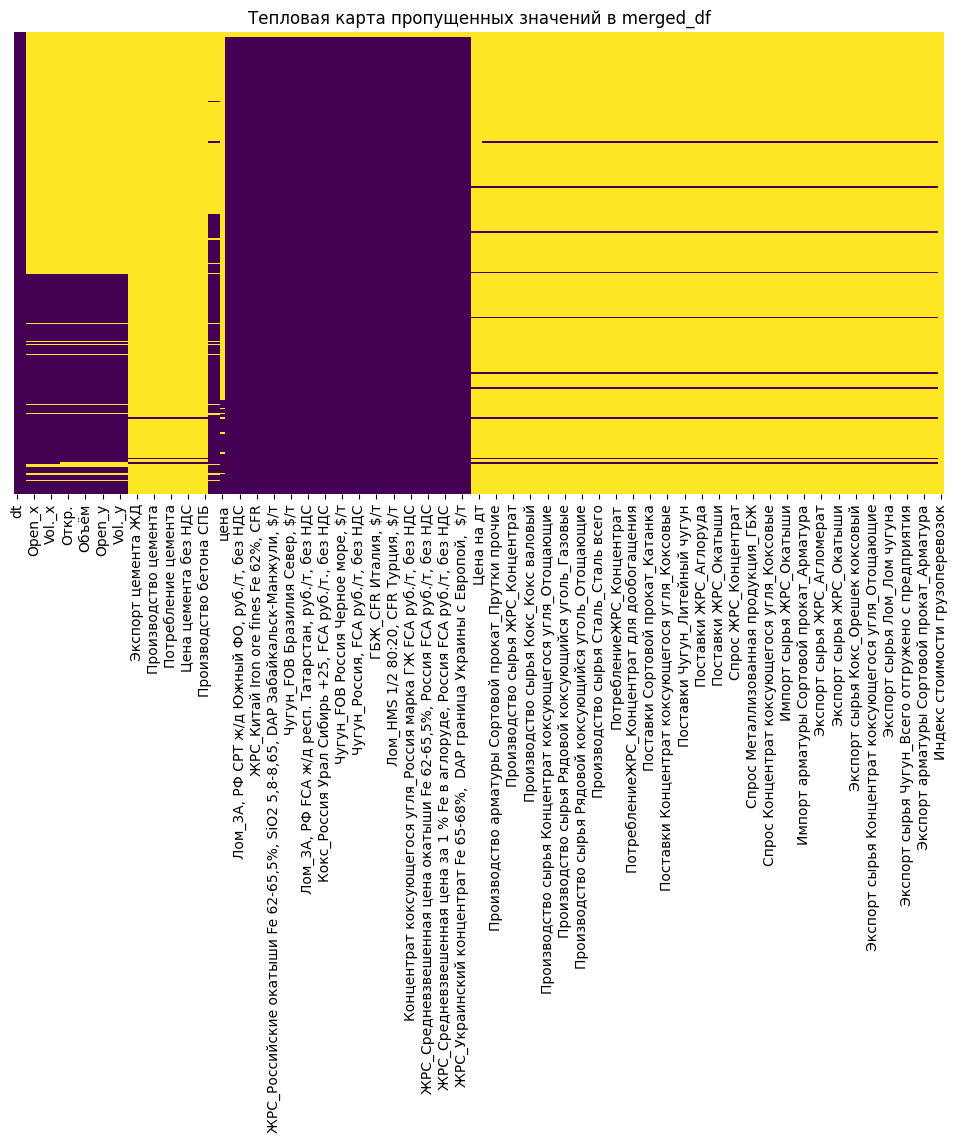

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Устанавливаем размер графика
plt.figure(figsize=(12, 6))

# Тепловая карта пропусков
sns.heatmap(merged_df.isnull(), cmap="viridis", cbar=False, yticklabels=False)

plt.title("Тепловая карта пропущенных значений в merged_df")
plt.show()
